In [14]:
from qutip import tensor, basis, sigmaz, sigmax, destroy, expect, identity, Qobj, mesolve
import numpy as np
import matplotlib.pyplot as plt

Qutip is python package for simulating quantum dynamics and is widely used in the quantum technologies field. It allows for the simulation of the Master equation as well as linear algebra manipulation.

First we will go over some basics of qutip

https://qutip.org/qutip-tutorials/

$ \mathbb{I}_2 $

In [15]:
Qobj([[1, 0], [0, 1]])

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]

$ \mathbb{I}_4 $

In [16]:
identity(4)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

$ \sigma_x $

In [17]:
sigmax()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

$ \sigma_x \sigma_x = \mathbb{I}_2 $

In [18]:
sigmax()*sigmax()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]

$ a $

In [19]:
destroy(5)

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = False
Qobj data =
[[0.         1.         0.         0.         0.        ]
 [0.         0.         1.41421356 0.         0.        ]
 [0.         0.         0.         1.73205081 0.        ]
 [0.         0.         0.         0.         2.        ]
 [0.         0.         0.         0.         0.        ]]

$ a^{\dagger}a = n $

In [20]:
destroy(5).dag()*destroy(5)

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 2. 0. 0.]
 [0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 4.]]

$ \sigma_z \otimes a^{\dagger}a = \begin{pmatrix}
                                    a^{\dagger}a & \mathbb{0} \\
                                    \mathbb{0} & -a^{\dagger}a
                                    \end{pmatrix} $

In [21]:
tensor([sigmaz(), destroy(5).dag()*destroy(5)])

Quantum object: dims = [[2, 5], [2, 5]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  2.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  3.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  4.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -2.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -3.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -4.]]

$ \vert 0 \rangle $

In [22]:
Qobj([[1], [0]])

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [23]:
basis(2, 0)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

$ \sigma_x \vert 0 \rangle = \vert 1 \rangle $

In [24]:
sigmax()*basis(2, 0)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

$ e^{-i \sigma_x t} \vert 0 \rangle = \frac{1}{\sqrt{2}}(e^{-it} \vert + \rangle + e^{it} \vert - \rangle) $

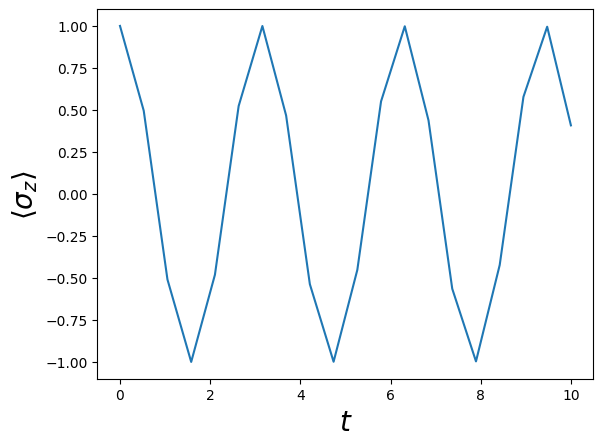

In [25]:
tlist = np.linspace(0, 10, 20)
result = mesolve(sigmax(), basis(2, 0), tlist, [], [sigmaz()])

fig, axes = plt.subplots(1, 1)

axes.plot(tlist, result.expect[0])

axes.set_xlabel(r"$t$", fontsize=20)
axes.set_ylabel(r"$\left<\sigma_z\right>$", fontsize=20);

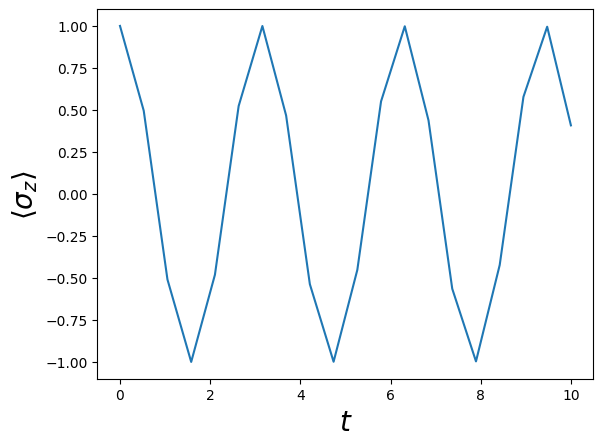

In [26]:
tlist = np.linspace(0, 10, 20)
result = mesolve(sigmax(), basis(2, 0), tlist, [], [])

fig, axes = plt.subplots(1, 1)

axes.plot(tlist, expect(sigmaz(), result.states))

axes.set_xlabel(r"$t$", fontsize=20)
axes.set_ylabel(r"$\left<\sigma_z\right>$", fontsize=20);

In [27]:
result.states

[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.86466373+0.j        ]
  [0.        -0.50235111j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.49528672+0.j        ]
  [0.        -0.86872957j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[-0.00815082+0.j        ]
  [ 0.        -0.99996678j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[-0.5093822+0.j       ]
  [ 0.       -0.8605404j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[-0.87273774+0.j        ]
  [ 0.        -0.48818935j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[-0.99986713+0.j        ]
  [ 0.        +0.01630116j]],
 Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[-0.8563599+0.j        ]
  [ 0.   

$ \rho = \vert 0 \rangle \langle 0 \vert $

In [28]:
rho0 = basis(2, 0)*basis(2, 0).dag()

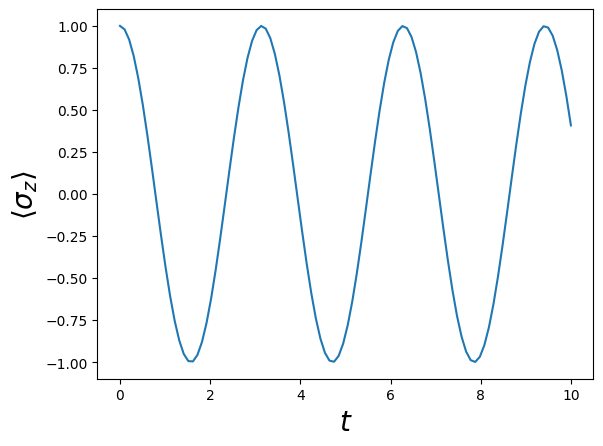

In [29]:
tlist = np.linspace(0, 10, 100)
result = mesolve(sigmax(), rho0, tlist, [], [sigmaz()])

fig, axes = plt.subplots(1, 1)

axes.plot(tlist, result.expect[0])

axes.set_xlabel(r"$t$", fontsize=20)
axes.set_ylabel(r"$\left<\sigma_z\right>$", fontsize=20);

We are going to define some classes to help us build a general quantum system based on the Jaynes-Cummings model 
$ H = \omega_c a^\dagger a - \frac{1}{2}\omega_a \sigma_z + g(a \sigma^+ + a^\dagger \sigma^-) $

https://qutip.org/docs/latest/guide/dynamics/dynamics-master.html

In [30]:
class QuantumDevice:
    def __init__(self, id_, frequency, dimension=None):
        self.id_ = id_
        self.frequency = frequency
        self.dimension = dimension
        self.device_number = None
        
    def hamiltonian(self):
        pass
    
    def coupling_hamiltonian(self):
        pass

    
class Qubit(QuantumDevice):
    def __init__(self, id_, frequency):
        super().__init__(id_, frequency, 2)
        
    def hamiltonian(self):
        return 0.5 * sigmaz()
    
    def coupling_hamiltonian(self):
        return destroy(2)
    
    
class Cavity(QuantumDevice):
    def __init__(self, id_, frequency, dimension = 3):
        super().__init__(id_, frequency, dimension)
        
    def hamiltonian(self):
        a = destroy(self.dimension)
        return a.dag() * a
    
    def coupling_hamiltonian(self):
        return destroy(self.dimension)
    
    
class Coupling(QuantumDevice):
    def __init__(self, id_, frequency, device1, device2):
        super().__init__(id_, frequency)
        self.device1 = device1
        self.device2 = device2


We now define a quantum system class to hold our quantum objects and to use them for simulating the Jaynes–Cummings Hamiltonian.

In [31]:
class QuantumSystem:
    def __init__(self):
        self.quantum_devices = {}
        self.couplings = {}
        
        
    def add_component(self, device):
        if isinstance(device, Coupling):
            self.couplings[device.id_] = device
        else:
            device.device_number = len(self.quantum_devices)
            self.quantum_devices[device.id_] = device
            
    def make_hilbert_space(self):
        hilbert_space = []
        for key, device in self.quantum_devices.items():
            hilbert_space.append(identity(device.dimension))
            
        return hilbert_space
            
    def make_hamiltonian(self):
        d_list = []
        for key, device in self.quantum_devices.items():
            d_list.append(device.frequency*device.hamiltonian())
        
        hamiltonian = tensor(d_list)
        
        for key, coupling in self.couplings.items():
            hilbert_space = self.make_hilbert_space()
            hilbert_space[coupling.device1.device_number] = coupling.device1.coupling_hamiltonian()
            hilbert_space[coupling.device2.device_number] = coupling.device2.coupling_hamiltonian().dag()
            coupling_operator = tensor(hilbert_space)
            
            coupling_term = coupling.frequency * (coupling_operator + coupling_operator.dag())
            hamiltonian += coupling_term
            
        return hamiltonian
    
    def make_initial_condition(self, **device_excitations):
        d_list = []
        for key, device in self.quantum_devices.items():
            d_list.append(basis(device.dimension, 0))
            
        for key, excitation in device_excitations.items():
            device = self.quantum_devices[key]
            d_list[device.device_number] = basis(device.dimension, excitation)
            
        return tensor(d_list)
        

Let's see our system in action. First a single qubit coupled to a cavity

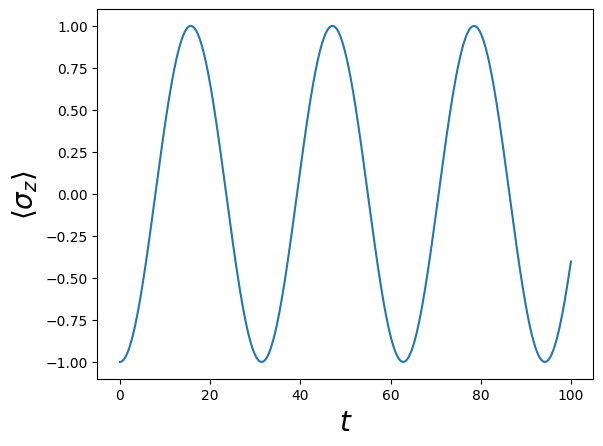

In [32]:
q0 = Qubit("Q0", 0.1)
c0 = Cavity("C0", 0.1, 5)
c_q0_c0 = Coupling("Q0_C0", 0.1, q0, c0)

qsys = QuantumSystem()
qsys.add_component(q0)
qsys.add_component(c0)
qsys.add_component(c_q0_c0)


tlist = np.linspace(0, 100, 1000)
result = mesolve(qsys.make_hamiltonian(), qsys.make_initial_condition(Q0 = 1), tlist, [], [])

z0 = qsys.make_hilbert_space()
z0[0] = sigmaz()
z_expect = expect(tensor(z0), result.states)

fig, axes = plt.subplots(1, 1)

axes.plot(tlist, z_expect)

axes.set_xlabel(r"$t$", fontsize=20)
axes.set_ylabel(r"$\left<\sigma_z\right>$", fontsize=20);

Now let's add a second qubit coupled to our first and slowly ramp up the coupling strength

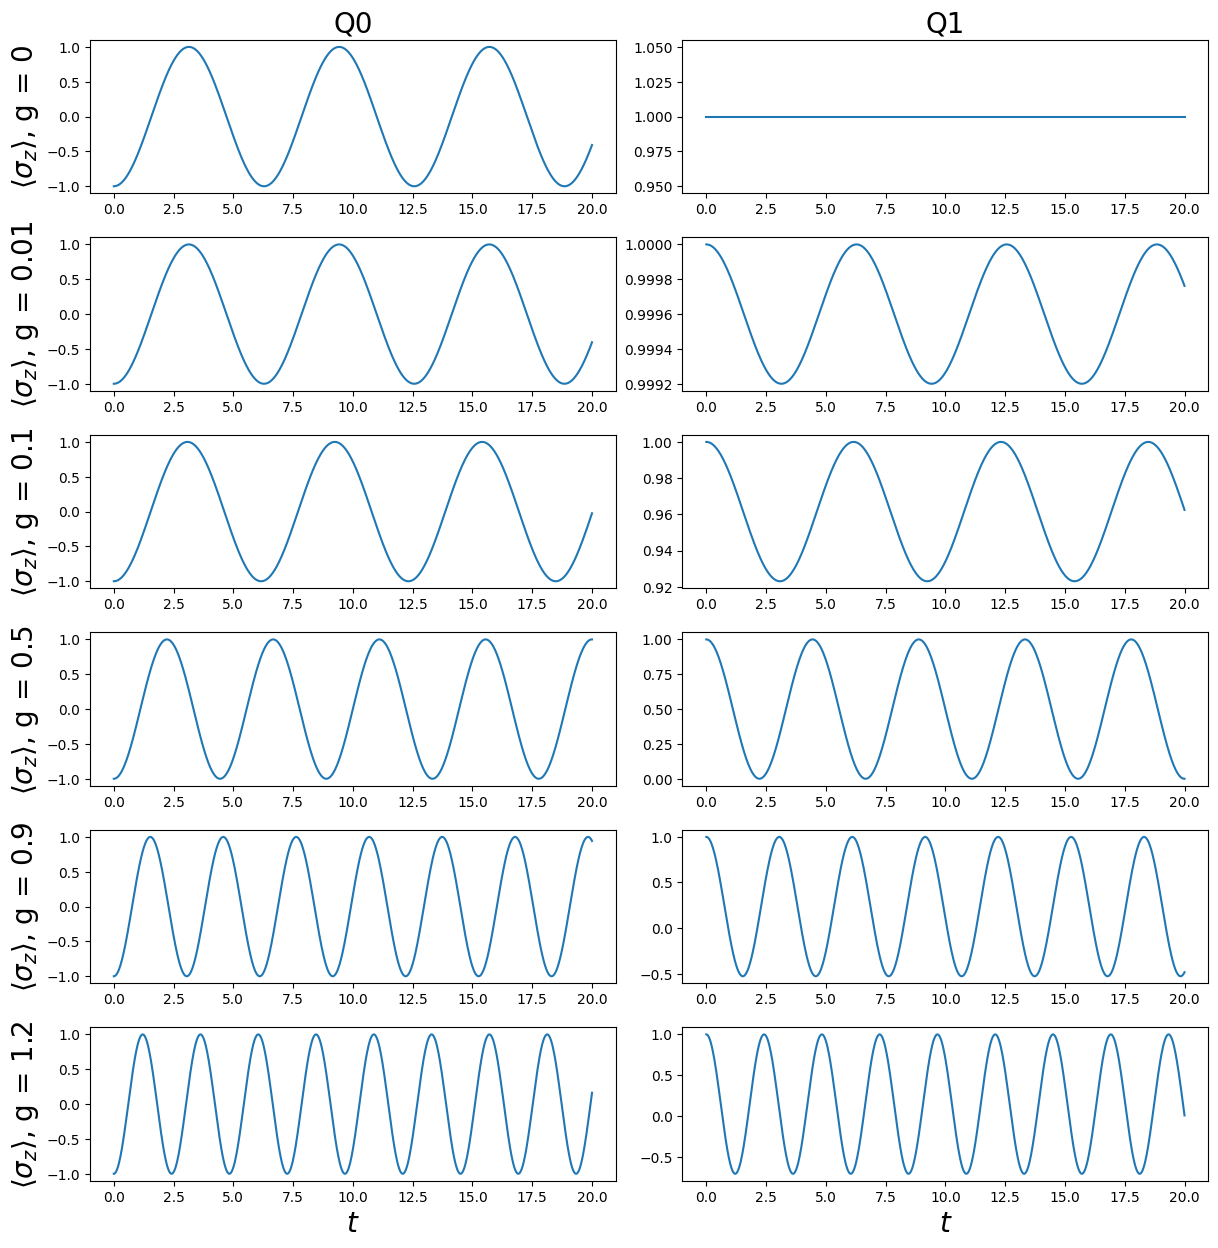

In [33]:
q0 = Qubit("Q0", 0.1)
q1 = Qubit("Q1", 0.1)
c0 = Cavity("C0", 0.1, 5)
c_q0_c0 = Coupling("Q0_C0", 0.5, q0, c0)
c_q0_q1 = Coupling("Q0_Q1", 0.0, q0, q1)

qsys = QuantumSystem()
qsys.add_component(q0)
qsys.add_component(q1)
qsys.add_component(c0)
qsys.add_component(c_q0_c0)
qsys.add_component(c_q0_q1)



tlist = np.linspace(0, 20, 1000)
z0 = qsys.make_hilbert_space()
z1 = qsys.make_hilbert_space()
z0[0] = sigmaz()
z1[1] = sigmaz()

z0_list = []
z1_list = []

coupling_strengths = (0, 0.01, 0.1, 0.5, 0.9, 1.2)
for g in coupling_strengths:
    c_q0_q1.frequency = g
    
    
    result = mesolve(qsys.make_hamiltonian(), qsys.make_initial_condition(Q0 = 1, Q1 = 0), tlist, [], [])
    
    z0_list.append(expect(tensor(z0), result.states))
    z1_list.append(expect(tensor(z1), result.states))
    

fig, axes = plt.subplots(6, 2, figsize=(12, 12))
fig.tight_layout()
axes[0][0].set_title("Q0", fontsize=20)
axes[0][1].set_title("Q1", fontsize=20)
axes[5][0].set_xlabel(r"$t$", fontsize=20)
axes[5][1].set_xlabel(r"$t$", fontsize=20)

for i, g in enumerate(coupling_strengths):
    axes[i][0].plot(tlist, z0_list[i])
    axes[i][1].plot(tlist, z1_list[i])
    
    axes[i][0].set_ylabel(fr"$\left<\sigma_z\right>$, g = {g}", fontsize=20);


This more complicated example has 2 qubit-cavity pairs coupled to eachother via the qubits

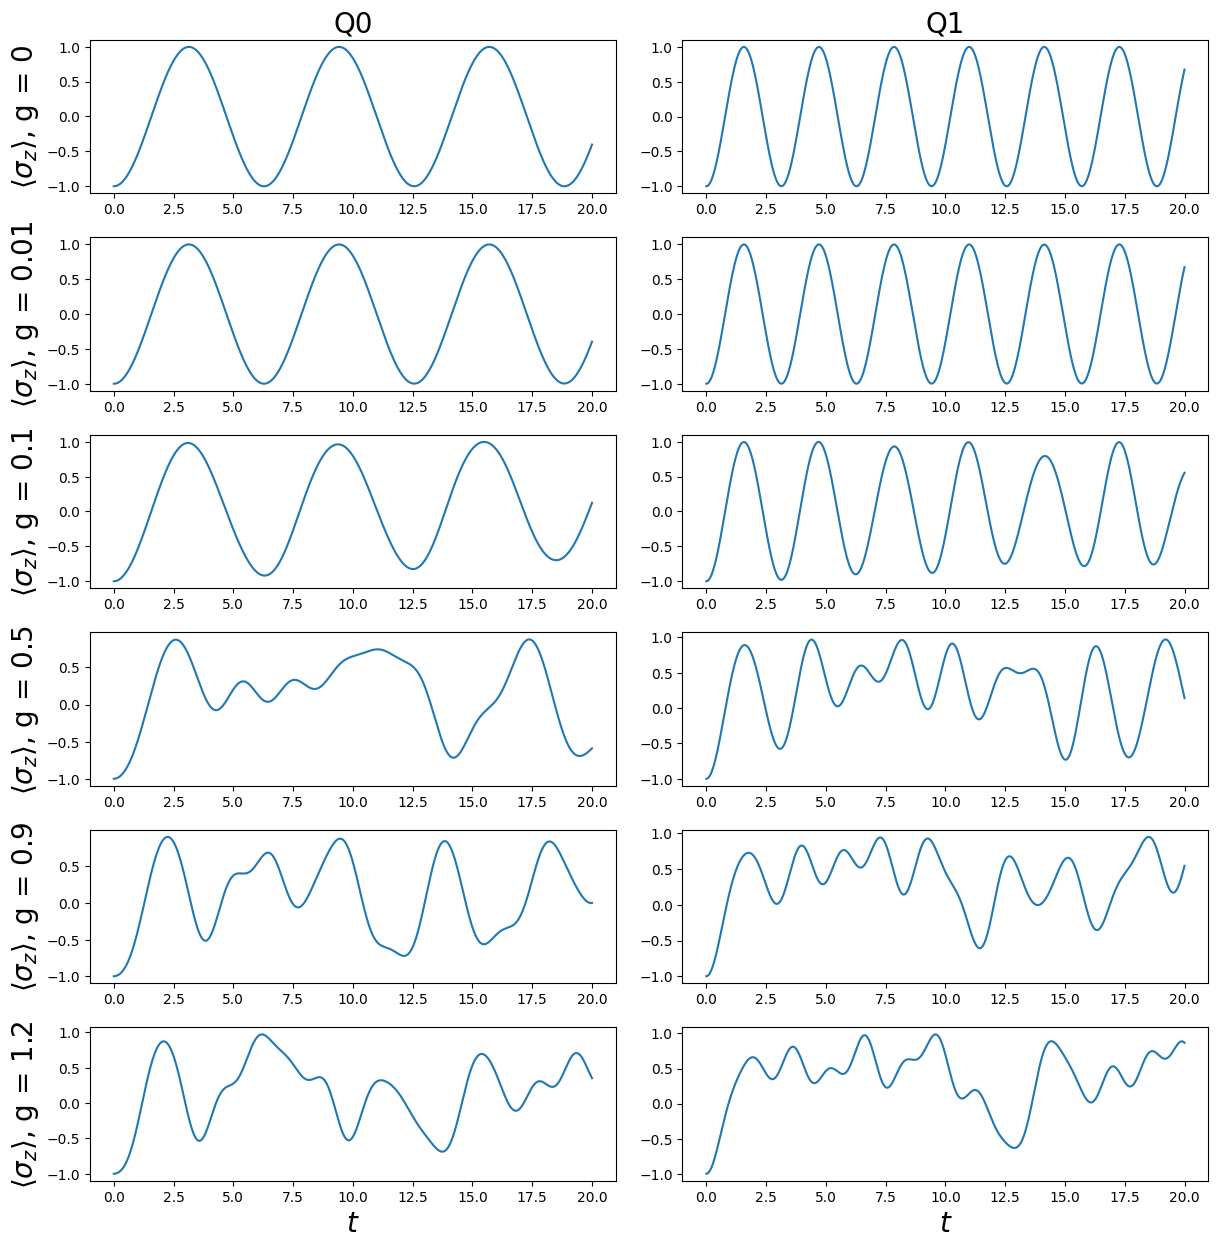

In [34]:
q0 = Qubit("Q0", 0.5)
q1 = Qubit("Q1", 1)
c0 = Cavity("C0", 0.5, 5)
c1 = Cavity("C1", 1, 5)
c_q0_c0 = Coupling("Q0_C0", 0.5, q0, c0)
c_q1_c1 = Coupling("Q1_C1", 1, q1, c1)
c_q0_q1 = Coupling("Q0_Q1", 0, q0, q1)

qsys = QuantumSystem()
qsys.add_component(q0)
qsys.add_component(q1)
qsys.add_component(c0)
qsys.add_component(c1)
qsys.add_component(c_q0_c0)
qsys.add_component(c_q1_c1)
qsys.add_component(c_q0_q1)


tlist = np.linspace(0, 20, 1000)
result = mesolve(qsys.make_hamiltonian(), qsys.make_initial_condition(Q0 = 1, Q1 = 1), tlist, [], [])
z0 = qsys.make_hilbert_space()
z1 = qsys.make_hilbert_space()
z0[0] = sigmaz()
z1[1] = sigmaz()

z0_list = []
z1_list = []

coupling_strengths = (0, 0.01, 0.1, 0.5, 0.9, 1.2)
for g in coupling_strengths:
    c_q0_q1.frequency = g
    
    
    result = mesolve(qsys.make_hamiltonian(), qsys.make_initial_condition(Q0 = 1, Q1 = 1), tlist, [], [])
    
    z0_list.append(expect(tensor(z0), result.states))
    z1_list.append(expect(tensor(z1), result.states))
    
    
fig, axes = plt.subplots(6, 2, figsize=(12, 12))
fig.tight_layout()
axes[0][0].set_title("Q0", fontsize=20)
axes[0][1].set_title("Q1", fontsize=20)
axes[5][0].set_xlabel(r"$t$", fontsize=20)
axes[5][1].set_xlabel(r"$t$", fontsize=20)

for i, g in enumerate(coupling_strengths):
    axes[i][0].plot(tlist, z0_list[i])
    axes[i][1].plot(tlist, z1_list[i])
    
    axes[i][0].set_ylabel(fr"$\left<\sigma_z\right>$, g = {g}", fontsize=20);    

We can model dissipative dynamics as well. mesolve is equivalent to solving the linblad master equation so we just need to define our jump operators, $ L_i $.
$ \dot{\rho} = - \frac{i}{\hbar}[H, \rho] + \Sigma_i \gamma_i (L_i \rho L_i^\dagger - \frac{1}{2}\{L_i^\dagger L_i, \rho\}) $

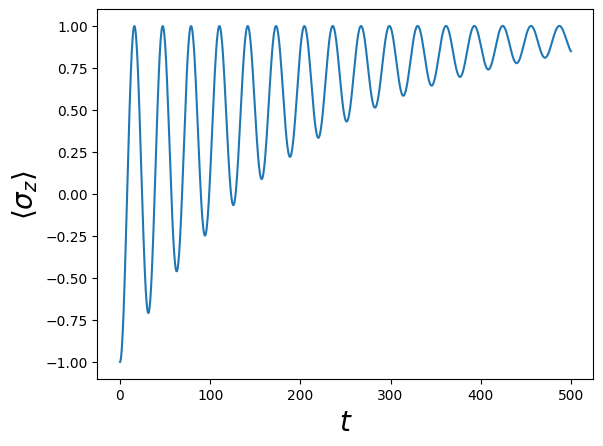

In [35]:
q0 = Qubit("Q0", 0.1)
c0 = Cavity("C0", 0.1, 5)
c_q0_c0 = Coupling("Q0_C0", 0.1, q0, c0)

qsys = QuantumSystem()
qsys.add_component(q0)
qsys.add_component(c0)
qsys.add_component(c_q0_c0)


tlist = np.linspace(0, 500, 1000)
# Define a collapse operator acting on the cavity
collapse = qsys.make_hilbert_space()
collapse[1] = np.sqrt(0.01)*destroy(5)

result = mesolve(qsys.make_hamiltonian(), qsys.make_initial_condition(Q0 = 1), tlist, [tensor(collapse)], [])

z0 = qsys.make_hilbert_space()
z0[0] = sigmaz()
z_expect = expect(tensor(z0), result.states)

fig, axes = plt.subplots(1, 1)

axes.plot(tlist, z_expect)

axes.set_xlabel(r"$t$", fontsize=20)
axes.set_ylabel(r"$\left<\sigma_z\right>$", fontsize=20);

Qutip can also model time-dependent Hamiltonians. Here we model a single qubit and a time-dependent drive. We assume the drive has an initial phase of zero. We make the rotating-wave approximation and shift into the frame of the drive.

$ H = \frac{\omega-\omega_d}{2} \sigma_z + \frac{\Omega(t)}{2}\sigma_x $

https://qutip.org/docs/4.1/guide/dynamics/dynamics-time.html

In [36]:
class Drive(QuantumDevice):
    def __init__(self, id_, frequency, target_device, shape='gaussian', amp=1, mean=50, width=5):
        super().__init__(id_, frequency, None)
        self.target_device = target_device
        self.shape = shape
        self.amp = amp
        self.mean = mean
        self.width = width
        
    def pulse(self, t, args):
        if self.shape == 'gaussian':
            return self.amp*np.exp(-((t-self.mean)/self.width)**2)
    
        elif self.shape == 'flat':
            return self.amp
        
        
class DrivenQuantumSystem(QuantumSystem):
    def __init__(self):
        super().__init__()
        # We only allow for one drive in this simple simulation as multiple drives is a bit more fiddly, 
        # especially if they have different drive frequencies.
        self.drive = None
        
    def add_component(self, device):
        if isinstance(device, Drive):
            self.drive = device
        else:
            super().add_component(device)
            
    def make_hamiltonian(self):
        # Update the frequency of devices to shift to the drive frame
        save_frequencies = {}
        for key, item in self.quantum_devices.items():
            save_frequencies[key] = item.frequency
            item.frequency = item.frequency - self.drive.frequency
        
        H0 = super().make_hamiltonian()
        
        hilbert_space = self.make_hilbert_space()
        hilbert_space[self.drive.target_device.device_number] = (self.drive.target_device.coupling_hamiltonian() + 
                                                                 self.drive.target_device.coupling_hamiltonian().dag())/2
        H1 = [tensor(hilbert_space), self.drive.pulse]
        
        # return device frequencies to their previous values
        for key, item in save_frequencies.items():
            self.quantum_devices[key].frequency = item
            
        return [H0, H1] # [H0, [H1, omega_1(t)], [H2, omega_2(t)], ...]
    

Let's make sure our pulses look as we expect them to look.

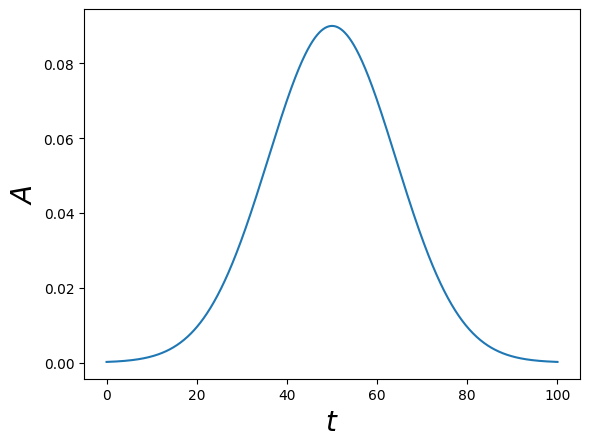

In [37]:
d0 = Drive("D0", 0.1, q0, shape='gaussian', amp=0.09, mean=50, width=20)

fig, axes = plt.subplots(1, 1)

tlist = np.linspace(0, 100, 1000)
axes.plot(tlist, [d0.pulse(t, None) for t in tlist])

axes.set_xlabel(r"$t$", fontsize=20)
axes.set_ylabel(r"$A$", fontsize=20);

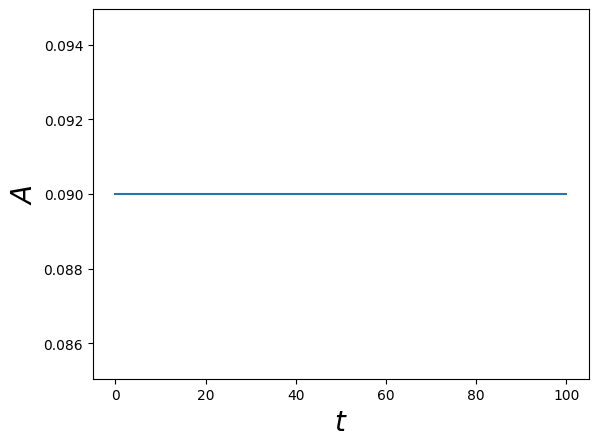

In [38]:
d0 = Drive("D0", 0.1, q0, shape='flat', amp=0.09, mean=50, width=20)

fig, axes = plt.subplots(1, 1)

tlist = np.linspace(0, 100, 1000)
axes.plot(tlist, [d0.pulse(t, None) for t in tlist])

axes.set_xlabel(r"$t$", fontsize=20)
axes.set_ylabel(r"$A$", fontsize=20);

A Gaussian pulse can be used to flip a qubit from it's ground state to it's excited state.

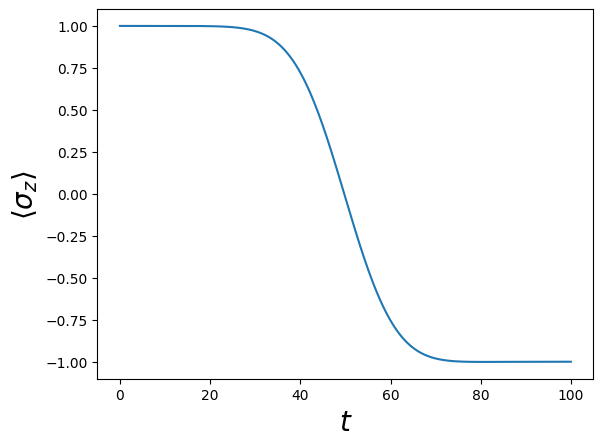

In [39]:
q0 = Qubit("Q0", 0.1)
d0 = Drive("D0", 0.1, q0, shape='gaussian', amp=0.09, mean=50, width=20)

qsys = DrivenQuantumSystem()
qsys.add_component(q0)
qsys.add_component(d0)

tlist = np.linspace(0, 100, 1000)
result = mesolve(qsys.make_hamiltonian(), qsys.make_initial_condition(Q0 = 0), tlist, [], [])

z0 = qsys.make_hilbert_space()
z0[0] = sigmaz()
z_expect = expect(tensor(z0), result.states)

fig, axes = plt.subplots(1, 1)

axes.plot(tlist, z_expect)

axes.set_xlabel(r"$t$", fontsize=20)
axes.set_ylabel(r"$\left<\sigma_z\right>$", fontsize=20);

We can also model dissipitive dynamics with our time-dependent Hamiltonian. Notice how the system tends towards a mixed state as opposed to the ground state like in the previous dissipitive example.

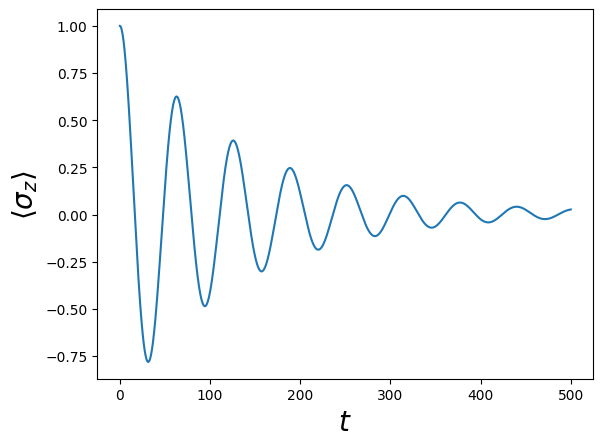

In [40]:
q0 = Qubit("Q0", 0.1)
d0 = Drive("D0", 0.1, q0, shape='flat', amp=0.1, mean=10, width=5)

qsys = DrivenQuantumSystem()
qsys.add_component(q0)
qsys.add_component(d0)

collapse = qsys.make_hilbert_space()
collapse[0] = np.sqrt(0.01)*destroy(2)

tlist = np.linspace(0, 500, 1000)
result = mesolve(qsys.make_hamiltonian(), qsys.make_initial_condition(Q0 = 0), tlist, [tensor(collapse)], [])

z0 = qsys.make_hilbert_space()
z0[0] = sigmaz()
z_expect = expect(tensor(z0), result.states)

fig, axes = plt.subplots(1, 1)

axes.plot(tlist, z_expect)

axes.set_xlabel(r"$t$", fontsize=20)
axes.set_ylabel(r"$\left<\sigma_z\right>$", fontsize=20);

This is only a brief overview of Qutip. We didn't have time to cover more complicated time dependent examples or stochastic and Monte Carlo simulations but please feel free to ask me if you have any further questions about qutip or object oriented-programming.